# ARIMA Example

An introduction to ARIMA forecasting with scalecast. The following topics are covered:  
1. Naive ARIMA Forecasting  
2. Using Exploratory Analysis to set ARIMA orders  
3. Using pmdarima to set ARIMA orders with an information criteria search  
4. Using scalecast to automatically set ARIMA orders with a grid search  
5. Plotting test-set predictions  
6. Plotting future forecasts  
7. Viewing ARIMA model summaries  

- data: https://www.kaggle.com/datasets/rakannimer/air-passengers
- blog post: https://towardsdatascience.com/forecast-with-arima-in-python-more-easily-with-scalecast-35125fc7dc2e

In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,7)})

In [2]:
df = pd.read_csv('AirPassengers.csv')
f = Forecaster(y=df['#Passengers'],current_dates=df['Month'])
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

## Naive Simple Approach

In [3]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

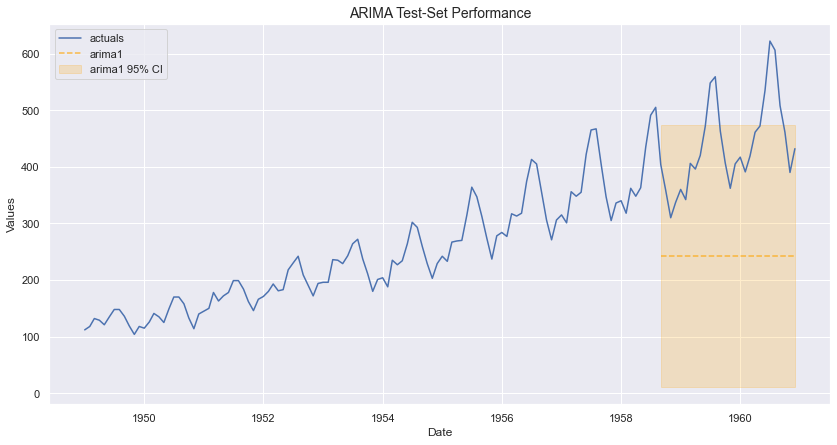

In [4]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

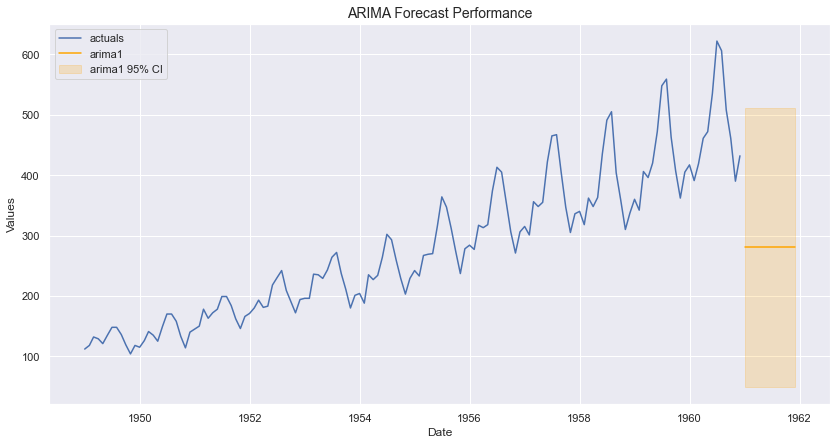

In [5]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

## Human Interpreation Iterative Approach

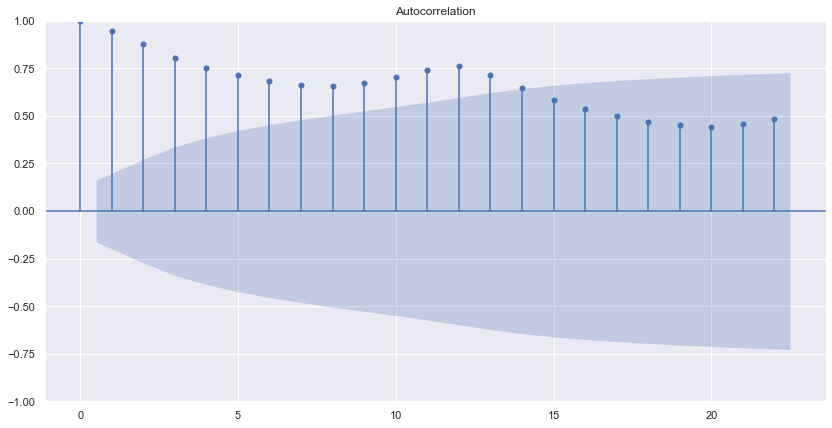

In [6]:
f.plot_acf()
plt.show()

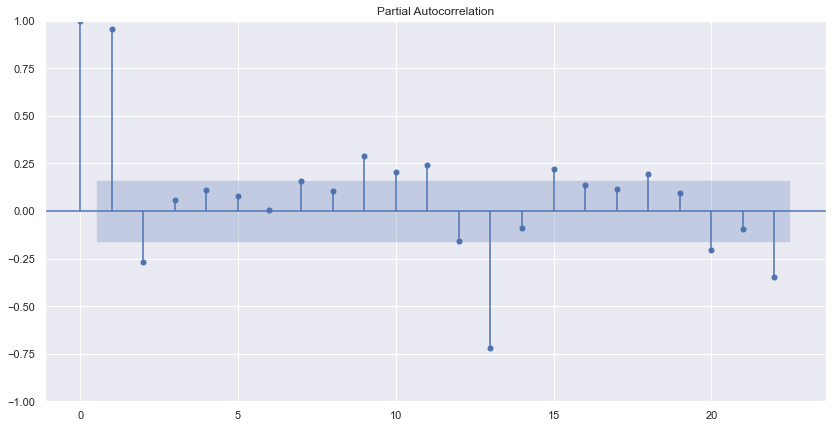

In [7]:
f.plot_pacf()
plt.show()

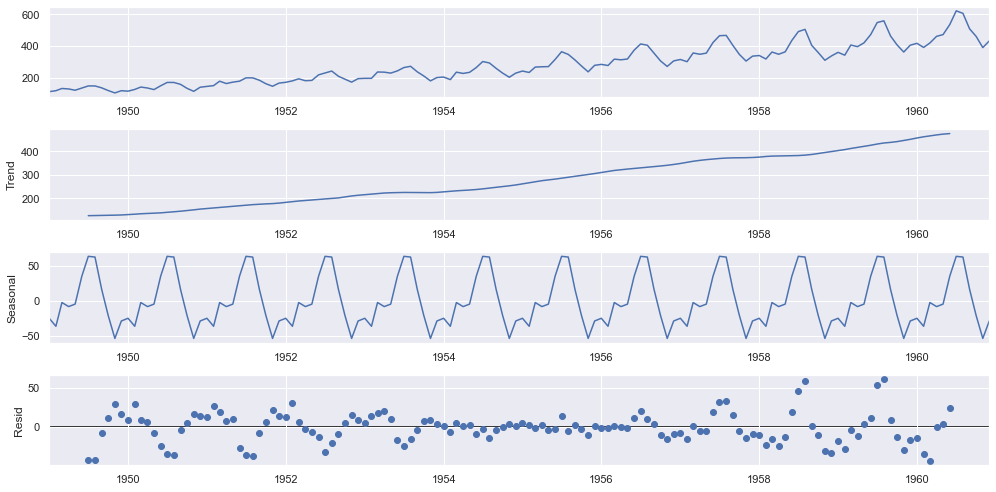

In [8]:
f.seasonal_decompose().plot()
plt.show()

In [9]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060569
0.9918802434376411


In [10]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

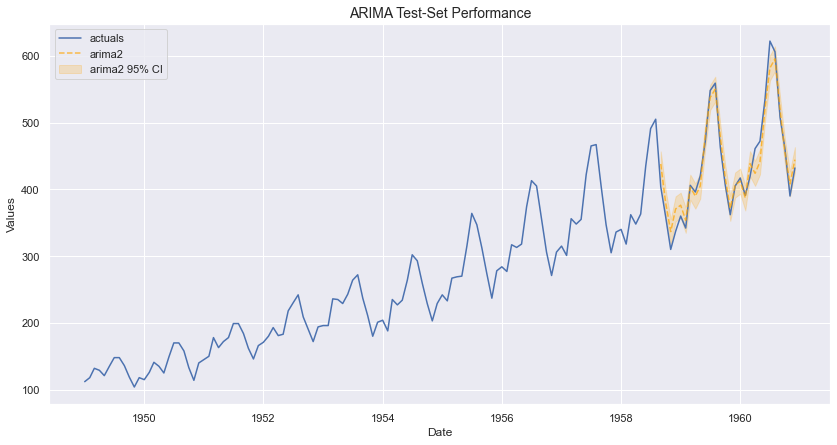

In [11]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

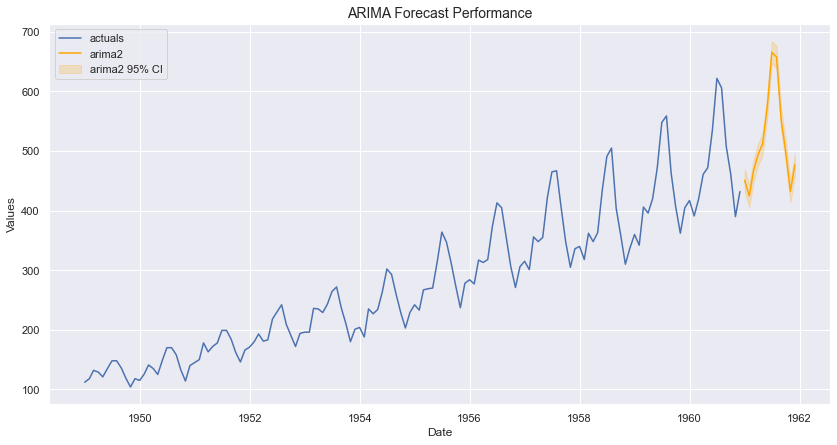

In [12]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [13]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.927
Date:                          Tue, 15 Mar 2022   AIC                           1015.853
Time:                                  08:53:28   BIC                           1033.105
Sample:                                       0   HQIC                          1022.863
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0761      0.272     -0.280      0.780      -0.609       0.457
ma.L1         -0.3545      0.247     -1.435      0.151      -0.839       0.130
ar.S.L12       0.6677      0.154      4.323      0.000       0.365       0.970
ar.S.L24       0.3309      0.099      3.359      0.001       0.138       0.524
ma.S.L12      -0.9744      1.198     -0.813      0.416      -3.322       1.374
sigma2       110.3892    110.779      0.996      0.319    -106.733     327.511
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.84
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.76   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Auto-ARIMA Approach

In [14]:
data = df.set_index('Month')
train = data.iloc[:int(.8*(df.shape[0])),:]
auto_model = auto_arima(train,start_P=1,start_q=1,max_p=6,max_q=6,m=12,seasonal=True,max_P=2, max_D=2,max_Q=2,
                            max_d=2,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True,information_criterion="aic",alpha=0.05,scoring='mse')

best_params = auto_model.get_params()
order = best_params['order']
seasonal_order = best_params['seasonal_order']
trend = best_params['trend']

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=760.183, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.16 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.096 seconds


In [15]:
f.manual_forecast(order=order,seasonal_order=seasonal_order,trend=trend,call_me='arima3')

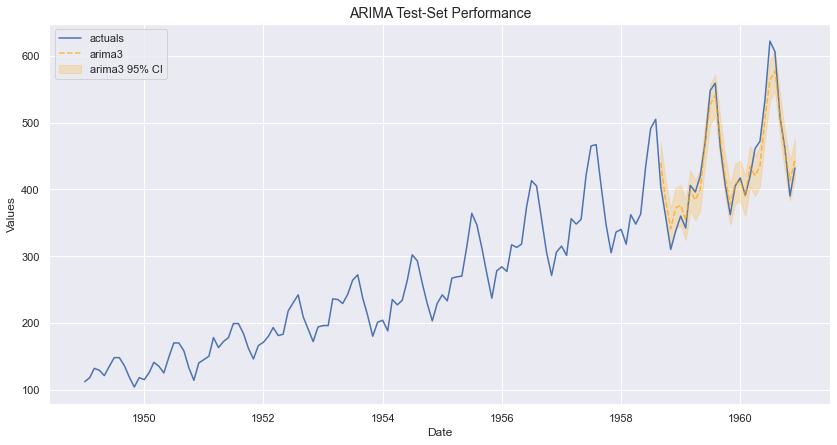

In [16]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

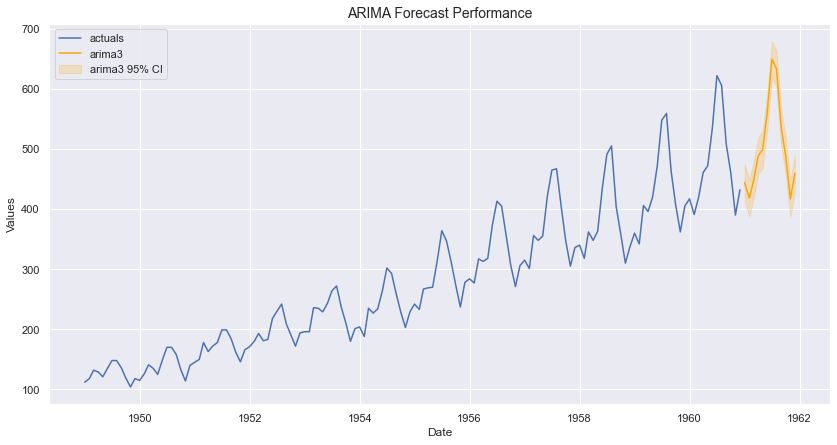

In [17]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [18]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -508.197
Date:                          Tue, 15 Mar 2022   AIC                           1020.393
Time:                                  08:53:30   BIC                           1026.144
Sample:                                       0   HQIC                          1022.730
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3076      0.073     -4.186      0.000      -0.452      -0.164
sigma2       137.0108     14.623      9.370      0.000     108.351     165.670
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.75
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Grid Search Approach

In [19]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

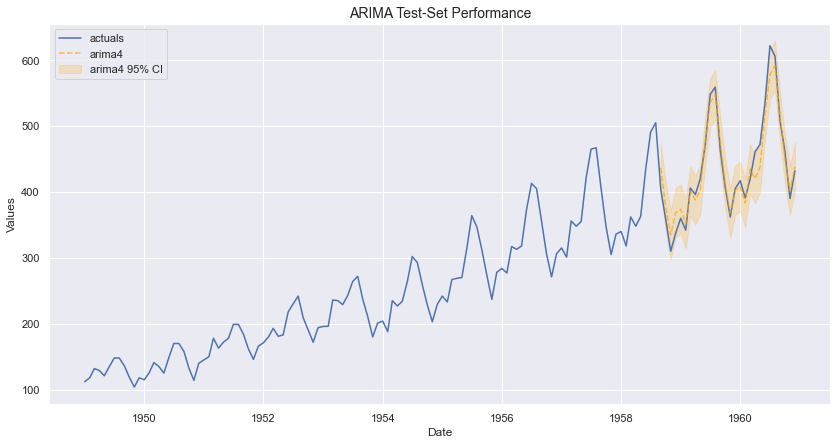

In [20]:
f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

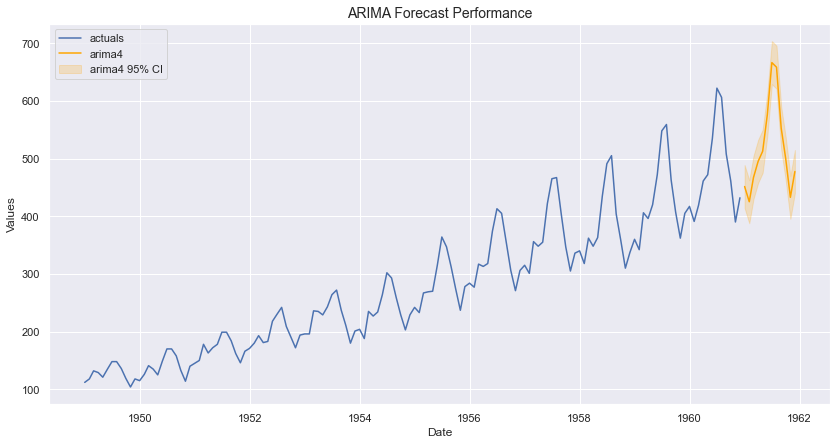

In [21]:
f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [22]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.958
Date:                          Tue, 15 Mar 2022   AIC                           1013.916
Time:                                  08:53:41   BIC                           1028.292
Sample:                                       0   HQIC                          1019.758
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4241      0.068     -6.221      0.000      -0.558      -0.290
ar.S.L12       0.6679      0.156      4.288      0.000       0.363       0.973
ar.S.L24       0.3310      0.097      3.414      0.001       0.141       0.521
ma.S.L12      -0.9773      1.372     -0.712      0.476      -3.666       1.711
sigma2       110.4379    129.256      0.854      0.393    -142.899     363.775
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.60
Prob(Q):                              0.91   Prob(JB):                         0.02
Heteroskedasticity (H):               2.80   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Export Results

In [23]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,excel_name='arima_results.xlsx',determine_best_by='TestSetMAPE')
summaries = results['model_summaries']
summaries[['ModelNickname','HyperParams','InSampleMAPE','TestSetMAPE']]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima4,"{'order': (0, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044540,0.036366
1,arima2,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044447,0.037167
2,arima3,"{'order': (1, 1, 0), 'seasonal_order': (0, 1, 0, 12), 'trend': None}",0.046255,0.044223
3,arima1,{},0.442457,0.430066


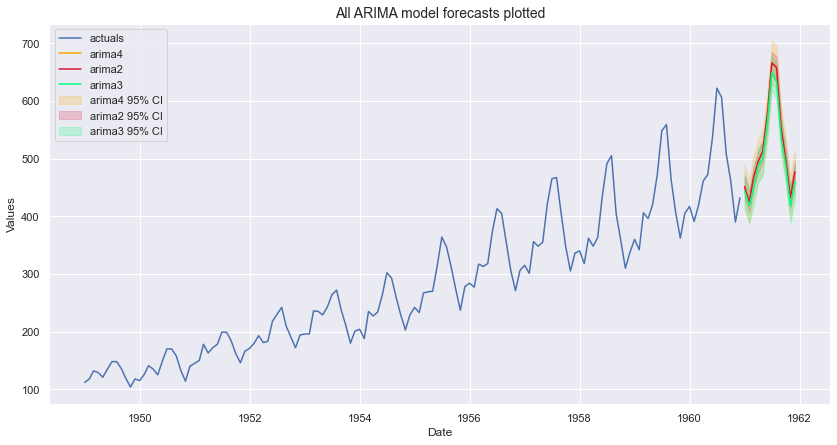

In [24]:
f.plot(ci=True,models=['arima2','arima3','arima4'],order_by='TestSetMAPE')
plt.title('All ARIMA model forecasts plotted',size=14)
plt.show()